In [1]:
import geopandas as gpd

### 加载world数据集

In [2]:
world = gpd.read_file('./datasets/naturalearth_lowres/naturalearth_lowres.shp')

In [3]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

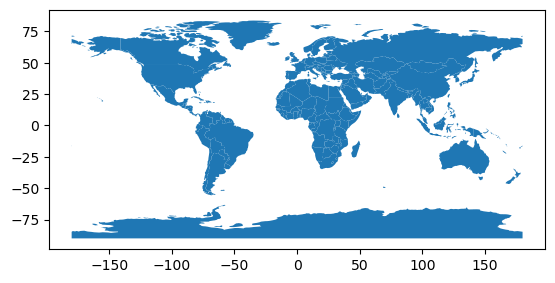

In [4]:
world.plot()

# 标准pandas方法：

### iloc 方法

In [5]:
# 选择前5行所有列
world.iloc[:5 , :]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [6]:
# 选择前5行 + 前3列
world.iloc[:5 , :3]

,pop_est,continent,name
0,889953.0,Oceania,Fiji
1,58005463.0,Africa,Tanzania
2,603253.0,Africa,W. Sahara
3,37589262.0,North America,Canada
4,328239523.0,North America,United States of America


### loc 方法

In [7]:
# 将 name 列设置为轴索引
world_re = world.set_index("name")
world_re

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,889953.0,Oceania,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,58005463.0,Africa,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253.0,Africa,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,37589262.0,North America,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,328239523.0,North America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...
Serbia,6944975.0,Europe,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
Montenegro,622137.0,Europe,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
Kosovo,1794248.0,Europe,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


In [8]:
# 选择从 Tanzania 到 Canada 行的数据
world_re.loc["Tanzania":"Canada" , :]

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Tanzania,58005463.0,Africa,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253.0,Africa,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,37589262.0,North America,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."


# 2.cx索引器：

In [9]:
# 选择纬度小于0的数据——南半球数据
southern_world = world.cx[: , :0]

In [10]:
southern_world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
7,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
11,86790567.0,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
12,10192317.3,Africa,Somalia,SOM,4719,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
13,52573973.0,Africa,Kenya,KEN,95503,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."
20,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."


<AxesSubplot:>

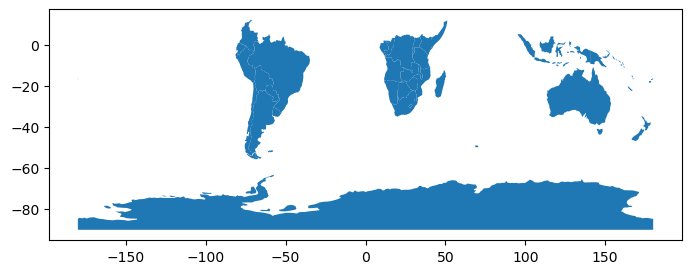

In [11]:
southern_world.plot(figsize=(10, 3))